In [1]:
import pandas as pd
import numpy as np

In [2]:
# Try to create a dataframe
user_data = {
    "MarksA":np.random.randint(1,100,5),
    "MarksB":np.random.randint(50,100,5),
    "MarksC":np.random.randint(1,100,5)
}

In [3]:
user_data

{'MarksA': array([51, 42,  2, 58,  8]),
 'MarksB': array([80, 59, 55, 93, 87]),
 'MarksC': array([47, 98, 18, 36, 72])}

In [4]:
df = pd.DataFrame(user_data)
print(df)

   MarksA  MarksB  MarksC
0      51      80      47
1      42      59      98
2       2      55      18
3      58      93      36
4       8      87      72


In [5]:
df.head(n=3)

,MarksA,MarksB,MarksC
0,51,80,47
1,42,59,98
2,2,55,18


In [6]:
print(df.columns)

Index(['MarksA', 'MarksB', 'MarksC'], dtype='object')


In [7]:
df.to_csv('marks.csv')

In [8]:
my_data = pd.read_csv('marks.csv')
my_data = my_data.drop(columns=['Unnamed: 0'])
my_data

,MarksA,MarksB,MarksC
0,51,80,47
1,42,59,98
2,2,55,18
3,58,93,36
4,8,87,72


# Pandas Basics 2

In [9]:
my_data.describe() #gives us some statistics about the data

,MarksA,MarksB,MarksC
count,5.000000,5.000000,5.00000
mean,32.200000,74.800000,54.20000
std,25.557778,16.946976,31.34007
min,2.000000,55.000000,18.00000
25%,8.000000,59.000000,36.00000
50%,42.000000,80.000000,47.00000
75%,51.000000,87.000000,72.00000
max,58.000000,93.000000,98.00000


In [10]:
# row
df.iloc[3]

MarksA    58
MarksB    93
MarksC    36
Name: 3, dtype: int32

In [11]:
# row and column
print(df.iloc[3,2])
print(df.iloc[3][2])
idx = [df.columns.get_loc('MarksC'),df.columns.get_loc('MarksB')]
print(df.iloc[3,idx])

36
36
MarksC    36
MarksB    93
Name: 3, dtype: int32


In [12]:
df.iloc[:3,idx]

,MarksC,MarksB
0,47,80
1,98,59
2,18,55


In [13]:
my_data

,MarksA,MarksB,MarksC
0,51,80,47
1,42,59,98
2,2,55,18
3,58,93,36
4,8,87,72


In [14]:
my_data.sort_values(by = ['MarksA','MarksB'],ascending=True)

,MarksA,MarksB,MarksC
2,2,55,18
4,8,87,72
1,42,59,98
0,51,80,47
3,58,93,36


In [15]:
# to convert the data into a numpy array
data_array = my_data.values

In [16]:
print(type(my_data))
print(type(data_array))
data_array.shape

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


(5, 3)

In [17]:
data_array

array([[51, 80, 47],
       [42, 59, 98],
       [ 2, 55, 18],
       [58, 93, 36],
       [ 8, 87, 72]], dtype=int64)

In [18]:
#numpy array back into pandas data frame
new_df = pd.DataFrame(data_array, dtype='int32', columns=['physics', 'Chem', 'Math'])

In [19]:
new_df

,physics,Chem,Math
0,51,80,47
1,42,59,98
2,2,55,18
3,58,93,36
4,8,87,72


In [20]:
new_df.to_csv('PCM.csv', index=False)

In [21]:
pcm = pd.read_csv('PCM.csv')
pcm

,physics,Chem,Math
0,51,80,47
1,42,59,98
2,2,55,18
3,58,93,36
4,8,87,72


# Loading and visualizing MNIST dataset using Pandas ad matplotlib

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('mnist_train.csv')

In [24]:
df.shape

(42000, 785)

In [25]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data = df.values

In [48]:
np.random.shuffle(data)
data

array([[8, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
X = data[:,1:]
Y = data[:,0]

In [50]:
print(X.shape, Y.shape)

(42000, 784) (42000,)


In [51]:
Y

array([8, 1, 9, ..., 4, 8, 7], dtype=int64)

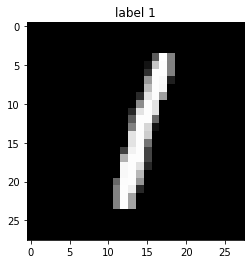

In [52]:
## Try to visualize one image
def drawImg(X,Y,i):
    plt.imshow(X[i].reshape(28,28), cmap = 'gray')
    plt.title('label '+str(Y[i]))
    plt.show()
    
drawImg(X,Y,1)

In [53]:
## Split this dataset

split = int(0.80*X.shape[0])
print(split)

33600


In [54]:
X_Train, Y_Train = X[ :split ,:], Y[:split]
X_Test, Y_Test = X[split: ,:], Y[split: ]

print(X_Test.shape, Y_Test.shape)
print(X_Train.shape, Y_Train.shape)

(8400, 784) (8400,)
(33600, 784) (33600,)


In [55]:
# Randomization - If dataset is not random, the training set will never learn some of the information due to the split
a = np.array([1,2,3,4,5])
np.random.shuffle(a)

print(a)

[4 2 1 5 3]


In [56]:
# Random shuffle of a 2D array - it will not change the data of a row wrt columns, but only shuffle rows
b = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.random.shuffle(b)
print(b)

[[4 5 6]
 [7 8 9]
 [1 2 3]]


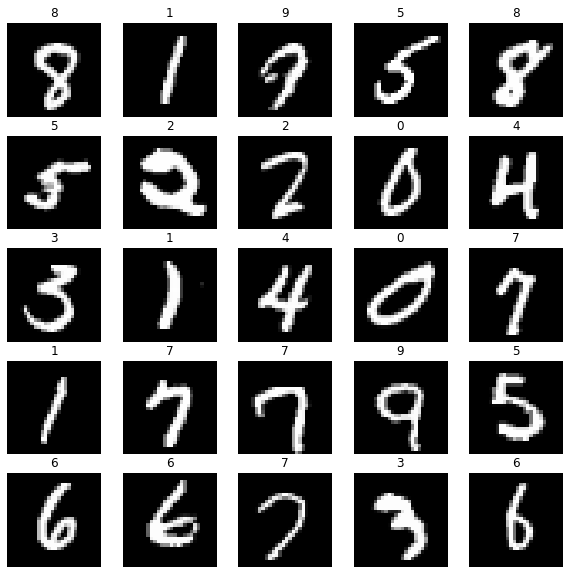

In [59]:
# Try to plot a visuaization (Grid of first 25 images 5 X 5)
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # as i starts from 0 and subplot numbering starts from 1
    plt.imshow(X_Train[i].reshape(28,28), cmap= 'gray')
    plt.title(Y_Train[i])
    plt.axis('off')
    

In [60]:
# If you dont want to split the data manually
from sklearn.model_selection import train_test_split

XT,Xt,YT,Yt = train_test_split(X,Y, test_size = 0.2, random_state = 5) 
# random_state is like a seed value so you can get same results no matter how many times you run this
print(XT.shape, YT.shape)
print(Xt.shape, Yt.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)
